The parameters of hypothesis function(regression line) for minimum value of MSE  are (3.1693073414069297, 0.184299493523456, 0.35013052491305335, 0.08632713980665216, -0.01488741940899109, 0.15170784608725002, 0.14833918979541225, 0.14550964314738937, 0.1341194543442194, 0.14463298760065355, 0.16792017049537591) respectively.
The minimum value of cost function thus obtained is 0.03778092558366422 
The MSE(mean squarederror) of the model for test dataset is 0.07556185116732844
The R2 (R-squared) error for the test dataset is 0.28101772042599193 and  for train dataset is 0.14871549600138734


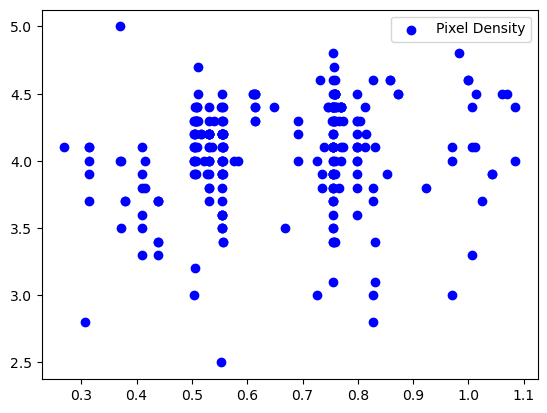

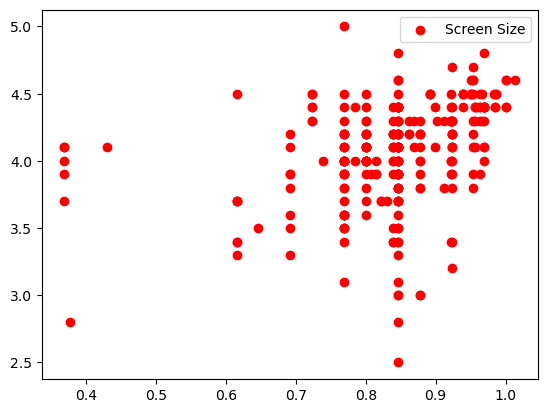

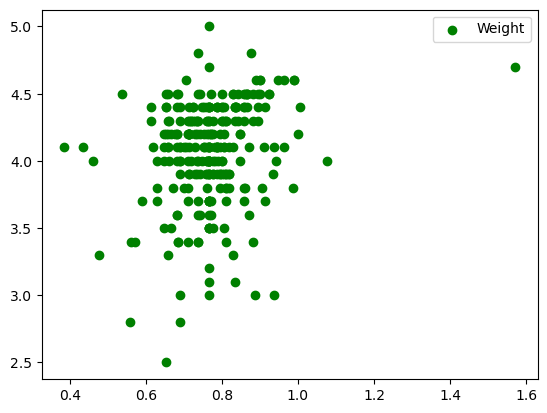

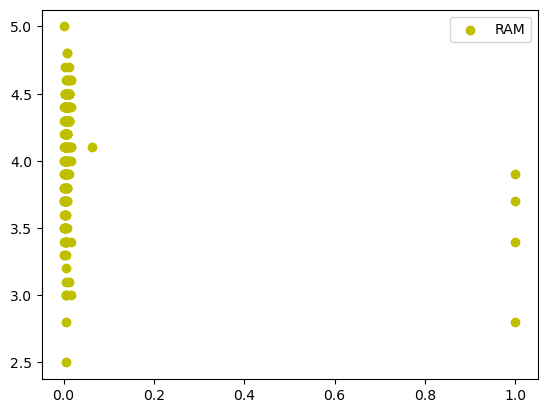

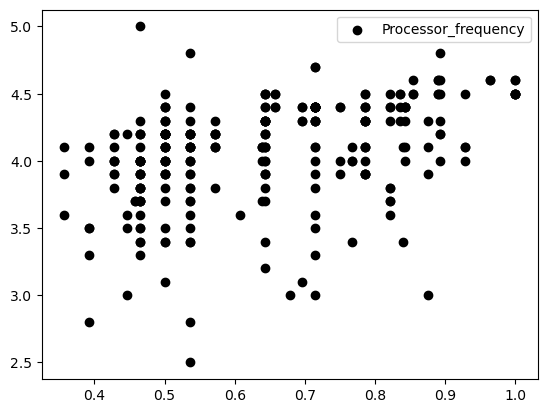

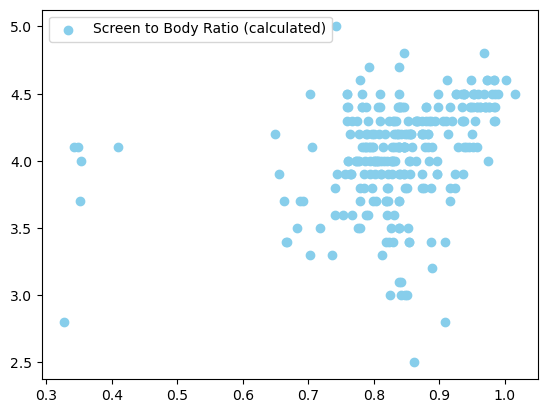

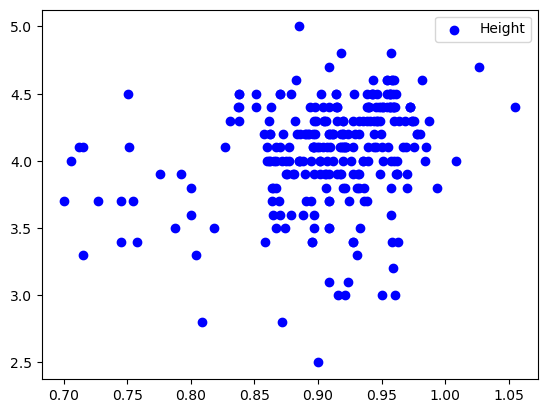

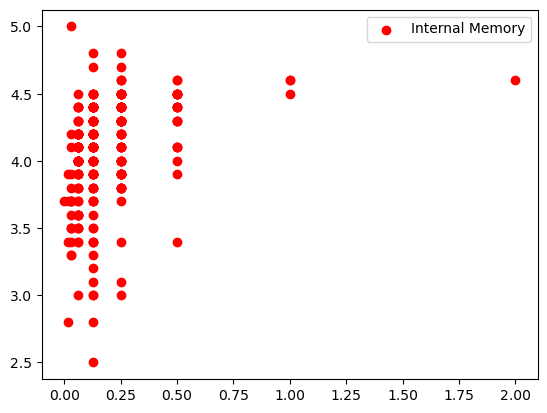

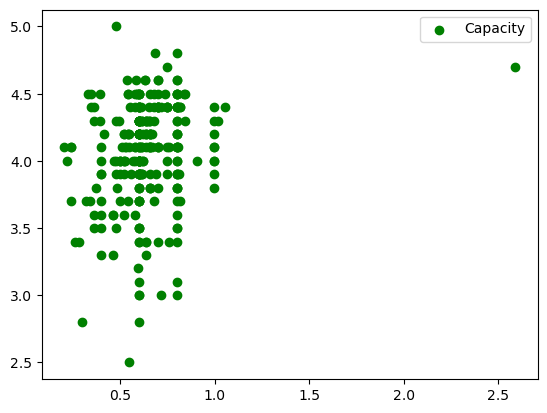

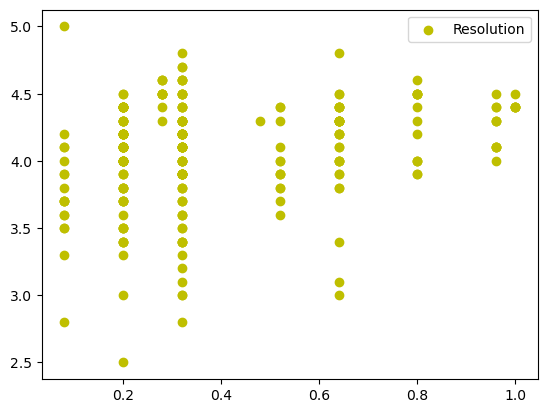

The impact of a feature is checked by its absolute weight.
Looking at absolute value of weights obtained for minimum error , Pixel density appears to have strong linear relationship with rating and processor frequency have the least impact on rating but looking at the graph RAM appears to have the least impact


'R-Squared is the ratio of the sum of squares regression (SSR) and the sum of squares total (SST).\nSum of Squares Regression (SSR) represents the total variation of all the predicted values found on the regression line or plane from the mean value of all the values of response variables. \nThe sum of squares total (SST) represents the total variation of actual values from the mean value of all the values of response variables. R-squared value is used to measure the goodness of fit or best-fit line. \nThe greater the value of R-Squared, the better is the regression model as most of the variation of actual values from the mean value get explained by the regression model.\n For the training dataset, the value of R-squared is bounded between 0 and 1, but it can become negative for the test dataset if the SSE is greater than SST. '

In [21]:
#LAB 9 Part2
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets

df=pd.read_csv('mobile_data (1).csv')
# print(df.head())
totalcolumns=['Pixel Density','Screen Size','Weight','RAM','Processor_frequency','Screen to Body Ratio (calculated)','Height','Internal Memory','Capacity','Resolution']
input = df.loc[:, totalcolumns]
output= df.loc[:,['Rating']]
input_train,input_test, output_train,output_test=train_test_split(input,output,random_state = 0,train_size=.80)
# x1 = input_train['Pixel Density']
# print(x1)
# print(input_train.iloc[:,1])
def J(*args):
    lst = args[0]
    h = lst[0]
    for i in range(input_train.shape[1]):#Hypothesis function
        #print(input_train[i])
            a = np.array(input_train.iloc[:,i]/max(input_train.iloc[:,i]))
            h = h+lst[i+1]*a
    out = np.array(output_train["Rating"])
    m = len(input_train)  
    sum1 = 0
    for i in range(m):
        sum1 = sum1+(h[i]-out[i])**2
    
    J = sum1/(2*m)
    return J

def J_test(*args):
    lst = args[0]
    h = lst[0]
    for i in range(input_test.shape[1]):#Hypothesis function
        #print(input_train[i])
            a = np.array(input_test.iloc[:,i]/max(input_test.iloc[:,i]))
            h = h+lst[i+1]*a
    out = np.array(output_test["Rating"])
    m = len(input_test)  
    sum3 = 0
    for i in range(m):
        sum3 = sum3+(h[i]-out[i])**2
    
    J_1 = sum3/(2*m)
    return J_1
def R_squared(*args):
    lst = args[0]
    h = lst[0]
    m = len(input_train)
    out = np.array(output_train["Rating"])
    for i in range(input_train.shape[1]):#Hypothesis function
        #print(input_train[i])
            a = np.array(input_train.iloc[:,i]/max(input_train.iloc[:,i]))
            h = h+lst[i+1]*a
    R1 = r2_score(out,h)
    h2 = lst[0]
    out2 = np.array(output_test["Rating"])
    for i in range(input_test.shape[1]):#Hypothesis function
        #print(input_train[i])
            a = np.array(input_test.iloc[:,i]/max(input_test.iloc[:,i]))
            h2 = h2+lst[i+1]*a
    R2 =  r2_score(out2,h2)
    return R1,R2
    

def gradJ(*args):
    lst = args[0]
    h = lst[0]
    for i in range(input_train.shape[1]):#Hypothesis function
        #print(input_train[i])
            a = np.array(input_train.iloc[:,i]/max(input_train.iloc[:,i]))
            h = h+lst[i+1]*a
    out = np.array(output_train["Rating"])
    m = len(input_train)
    grad = []
    sum0 = 0
    for i in range(m):
        sum0 = sum0 + (h[i] - out[i])
    J1 = sum0/m
    grad.append(J1)
    for i in range(input_train.shape[1]):
        sum2 = 0
        a = np.array(input_train.iloc[:,i]/max(input_train.iloc[:,i]))
        for j in range(m):
            sum2 = sum2+(h[j] - out[j])*a[j]
        J2 = sum2/m
        grad.append(J2)
        
    grad_J = np.array(grad)
    return grad_J
class unidirection_search():#line search
    def __init__(self,w_s,s):
        self.w_s = w_s
        self.s = s
    def u_s(self,a):
        num = input_train.shape[1]
        self.array = []
        for i in range(num+1):
            self.array.append(self.w_s[i]  + a*self.s[i])
        j1 = J(self.array)
        return j1
    def critical(self,a,b,n):
        self.delta  = (b-a)/n
        self.a1 = a
        self.a2 = self.a1+self.delta
        self.a3 = self.a2+self.delta
        while self.a3<=b:
            if self.u_s(self.a1)>=self.u_s(self.a2)<=self.u_s(self.a3):
                self.tup1 = (self.a1,self.a3)
                return self.tup1
            else:
                self.a1 = self.a2
                self.a2 = self.a3
                self.a3 = self.a3 + self.delta
        self.tup = 0 
        self.tup1 = b
   
    def interval_halving(self,a,b):
        self.E = 0.000001
        self.a = a
        self.b = b
        self.L = self.b-self.a
        self.a_m = (self.a+self.b)/2
        while abs(self.L)>=self.E:
            self.Ja = self.u_s(self.a_m)
            self.a1 = self.a+self.L/4
            self.a2 = self.b-self.L/4
            self.Ja1 = self.u_s(self.a1)
            self.Ja2 = self.u_s(self.a2)
            if self.Ja1 < self.Ja:
                self.b = self.a_m
                self.a_m = self.a1
            elif self.Ja2 < self.Ja:
                self.a = self.a_m
                self.a_m = self.a2
            else:
                self.b = self.a2
                self.a = self.a1
                self.a_m = (self.a+self.b)/2
            self.L = self.b-self.a
        self.tup_3 = (self.a,self.b)
        return (self.tup_3[0]+self.tup_3[1])/2
class steepest_gradient():#steepest gradient descent
    def __init__(self,w_s,E1,E2):#w_s is the starting point and s is the direction vector (in this case it will be -grad(J))
        self.w_s = w_s
        self.E1 = E1
        self.E2 = E2
    def grad_des(self,a,b):#gradient descent procedure
        c = unidirection_search(self.w_s,-1*gradJ(self.w_s))#Finding correct alpha using linear search
        
        self.a = c.interval_halving(a,b) 
        num = input_train.shape[1]
        self.array = []
        for i in range(num+1):
            self.array.append(self.w_s[i]  + self.a*(-gradJ(self.w_s)[i]))
        self.grad_1 = gradJ(self.array)
        self.J1 = J(self.array)
        self.k = 0
        while np.linalg.norm(self.grad_1) > self.E1 and self.k<=1000 :#stopping criteria
            c = unidirection_search(self.array,-1*self.grad_1)
            self.a = c.interval_halving(a,b)
            self.array1 = []
            for i in range(num+1):
                    self.array1.append(self.array[i]  + self.a*(-gradJ(self.array)[i]))
            
            if abs(np.dot(gradJ(self.array),gradJ(self.array1))) < self.E2:#stopping criteria
                  break
            self.array = self.array1
            self.grad_1 = gradJ(self.array)
            self.k += 1
        return self.array
     
    def minimum(self):
        min_J = J_test(self.array) 
        R1,R2 = R_squared(self.array)
        return min_J,R1,R2

w_s = [3,0.1,0.2,0,0,0,0,0,0.1,0.1,0.1]
a = 0
b = 1 #put b>=1 to get the perfect value of 0 as minimum
E1 = 0.0000001
E2 = 0.0000001
# n = 100
c1 = steepest_gradient(w_s,E1,E2)
w = tuple(c1.grad_des(a,b))
print(f"The parameters of hypothesis function(regression line) for minimum value of MSE  are {w} respectively.") 
J_min,R_train,R_test = c1.minimum()
print(f"The minimum value of cost function thus obtained is {J_min} ")
print(f"The MSE(mean squarederror) of the model for test dataset is {2*J_min}")
print(f"The R2 (R-squared) error for the test dataset is {R_test} and  for train dataset is {R_train}")
c=['b','r','g','y','black','skyblue']*2
col = [i for i in input_train]
# This is the function to check univariate error in all the features using the obtained weigths 
# lst = list(w)
# err_lst = []
# for i in range(input_train.shape[1]):#Hypothesis function
#     #print(input_train[i])
#         h = lst[0]
#         a = np.array(input_train.iloc[:,i]/max(input_train.iloc[:,i]))
#         h = h+lst[i+1]*a
#         out = np.array(output_train["Rating"])
#         m = len(input_train)  
#         sum1 = 0
#         for i in range(m):
#             sum1 = sum1+(h[i]-out[i])**2

#         J = sum1/(2*m)
#         err_lst.append(J)
# print(err_lst)
        
        
for i in range(input_train.shape[1]):
    
    a = np.array(input_train.iloc[:,i]/max(input_test.iloc[:,i]))
    pl.scatter(a,output_train,label = col[i],c=c[i])
    pl.legend()
    pl.show()
print("The impact of a feature is checked by its absolute weight.")
print("Looking at absolute value of weights obtained for minimum error , Pixel density appears to have strong linear relationship with rating and processor frequency have the least impact on rating but looking at the graph RAM appears to have the least impact")
    
    
'''R-Squared is the ratio of the sum of squares regression (SSR) and the sum of squares total (SST).
Sum of Squares Regression (SSR) represents the total variation of all the predicted values found on the regression line or plane from the mean value of all the values of response variables. 
The sum of squares total (SST) represents the total variation of actual values from the mean value of all the values of response variables. R-squared value is used to measure the goodness of fit or best-fit line. 
The greater the value of R-Squared, the better is the regression model as most of the variation of actual values from the mean value get explained by the regression model.
 For the training dataset, the value of R-squared is bounded between 0 and 1, but it can become negative for the test dataset if the SSE is greater than SST. '''